In [1]:
import matplotlib.pyplot as plt
import tdt

import trompy as tp


%run "..//source//NAD functions.py"

In [2]:
folder = "D:\\Test Data\\photometry\\NAc GRAB photometry\\"

data = tdt.read_block(folder+"Test-220609-101142")

read from t=0s to t=3816.41s


In [3]:
licks = data.epocs._7RL_.onset
sipper = data.epocs._7sp_.onset
blue = data.streams._4657.data
uv = data.streams._4057.data

fs = data.streams._4657.fs

corrected_signal = tp.processdata(blue, uv)

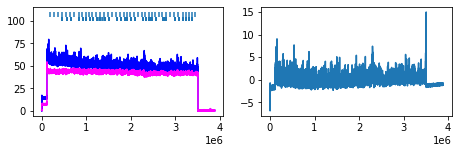

In [4]:
f, ax = plt.subplots(ncols=2, figsize=(7.5, 2))
ax[0].plot(blue, color="blue")
ax[0].plot(uv, color="magenta")

ax[1].plot(corrected_signal)

licks_in_samples = [int(event*fs) for event in licks]
sipper_in_samples = [int(event*fs) for event in sipper]

ax[0].vlines(licks_in_samples, 100, 105)
ax[0].vlines(sipper_in_samples, 105, 110)



In [5]:
lickdata = tp.lickCalc(licks)
runs = lickdata["rStart"]

c:\Users\jmc010\Miniconda3\envs\NAD\lib\site-packages\trompy\lick_utils.py:249: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))


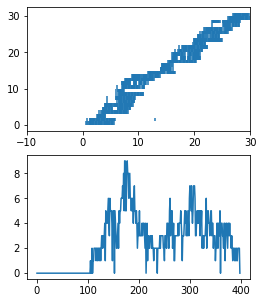

In [20]:
licks_aligned_to_sip = []
for sip in sipper:
    licks_aligned_to_sip.append([lick-sip for lick in licks if (lick>sip-10) and (lick<sip+30)])

latency = []
for trial in licks_aligned_to_sip:
    if len(trial) > 0:
        latency.append([lick for lick in trial if lick>0][0])
    else:
        latency.append(np.nan)

inds = np.argsort(latency)
licks_aligned_to_sip_sorted = [licks_aligned_to_sip[i] for i in inds]
licks_aligned_to_sip_sorted

f, ax = plt.subplots(nrows=2, figsize=(4, 5))

for idx, licks_in_trial in enumerate(licks_aligned_to_sip_sorted):
    ax[0].vlines(licks_in_trial, idx, idx+1)

ax[0].set_xlim([-10, 30])

bins=np.arange(-10, 30, 0.1)
licks_hist = np.histogram(tp.flatten_list(licks_aligned_to_sip), bins=bins)
ax[1].plot(licks_hist[0])


In [19]:
licks_aligned_to_sip_sorted

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [26.887782399999878,
  27.13485311999989,
  27.234795519999807,
  27.331788799999913,
  27.436810239999886,
  27.542814719999797,
  27.657830399999966,
  27.775795199999948,
  27.898839039999984,
  28.013854719999927,
  28.144762879999917,
  28.257812479999984,
  28.392816639999864,
  28.544696319999957,
  28.677734399999963,
  28.79291391999982,
  28.917923839999958,
  29.04195071999993,
  29.159915519999913,
  29.263790079999808,
  29.402890239999806,
  29.52691711999978,
  29.646847999999864,
  29.76874495999982],
 [26.10987007999995,
  26.277806080000005,
  26.376765439999986,
  26.472775679999927,
  26.566983679999908,
  26.67692031999991,
  26.785873919999972,
  26.899906559999977,
  27.012792319999903,
  27.1328870399999,
  27.2428236799999,
  27.391754239999955,
  27.505950719999987,
  27.63292672,
  27.746795519999978,
  27.858862079999994,
  27.968798719999995,
  28.09102336000001,
  28.205711359999896,
  28.3197439999999,
  28.42

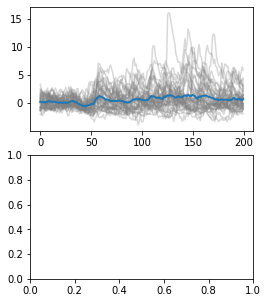

In [7]:
#aligned to first lick in run, NAD22
f, ax = plt.subplots(nrows=2, figsize=(4, 5))

snips = []

for sip in sipper:
    snip =get_snips_baseline(sip, fs, corrected_signal, pre=5, length=20, bins=200)
    snips.append(snip)
    ax[0].plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean= np.mean(snips, axis=0)
ax[0].plot(mean, linewidth=2)

In [8]:
np.shape(snips)

(40, 200)

events sorted


TypeError: 'AxesSubplot' object is not subscriptable

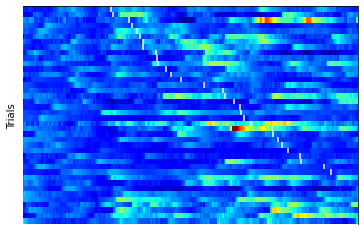

In [47]:


def make_heatmap(data, events=None, ax=None, cmap="jet", sort=True, ylabel="Trials"):

    if ax == None:
        f, ax = plt.subplots()

    (ntrials, bins) = np.shape(data)

    xvals = np.linspace(-10,30,bins)
    yvals = np.arange(0, ntrials)
    xx, yy = np.meshgrid(xvals, yvals)

    if sort == True:
        try:
            inds = np.argsort(events)
            data = [data[i] for i in inds]
            events = [events[i] for i in inds]
        except:
            print("Events cannot be sorted")

    mesh = ax.pcolormesh(xx, yy, data, cmap=cmap, shading="auto")

    if events:
        ax.vlines(events, yvals-0.5, yvals+0.5, color='w')

    ax.set_ylabel(ylabel, rotation=90, labelpad=2)

    ax.invert_yaxis()
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # ax.set_ylim([ntrials+1, 1])

    return ax, mesh

f, ax = plt.subplots()
_ = make_heatmap(snips, events=latency, ax=ax, sort=True)




# tp.makeheatmap(ax, snips, preTrial=5)

In [41]:
latency2 = [-5] + [10] + [20] + [np.nan]*37

events sorted


<AxesSubplot:>

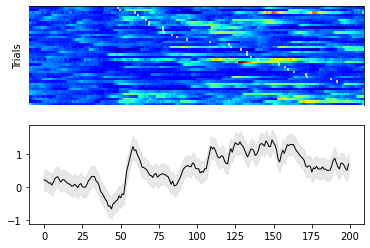

In [49]:
f, ax = plt.subplots(nrows=2)
_ = make_heatmap(snips, events=latency, ax=ax[0], sort=True)

tp.shadedError(ax[1], snips)


